In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


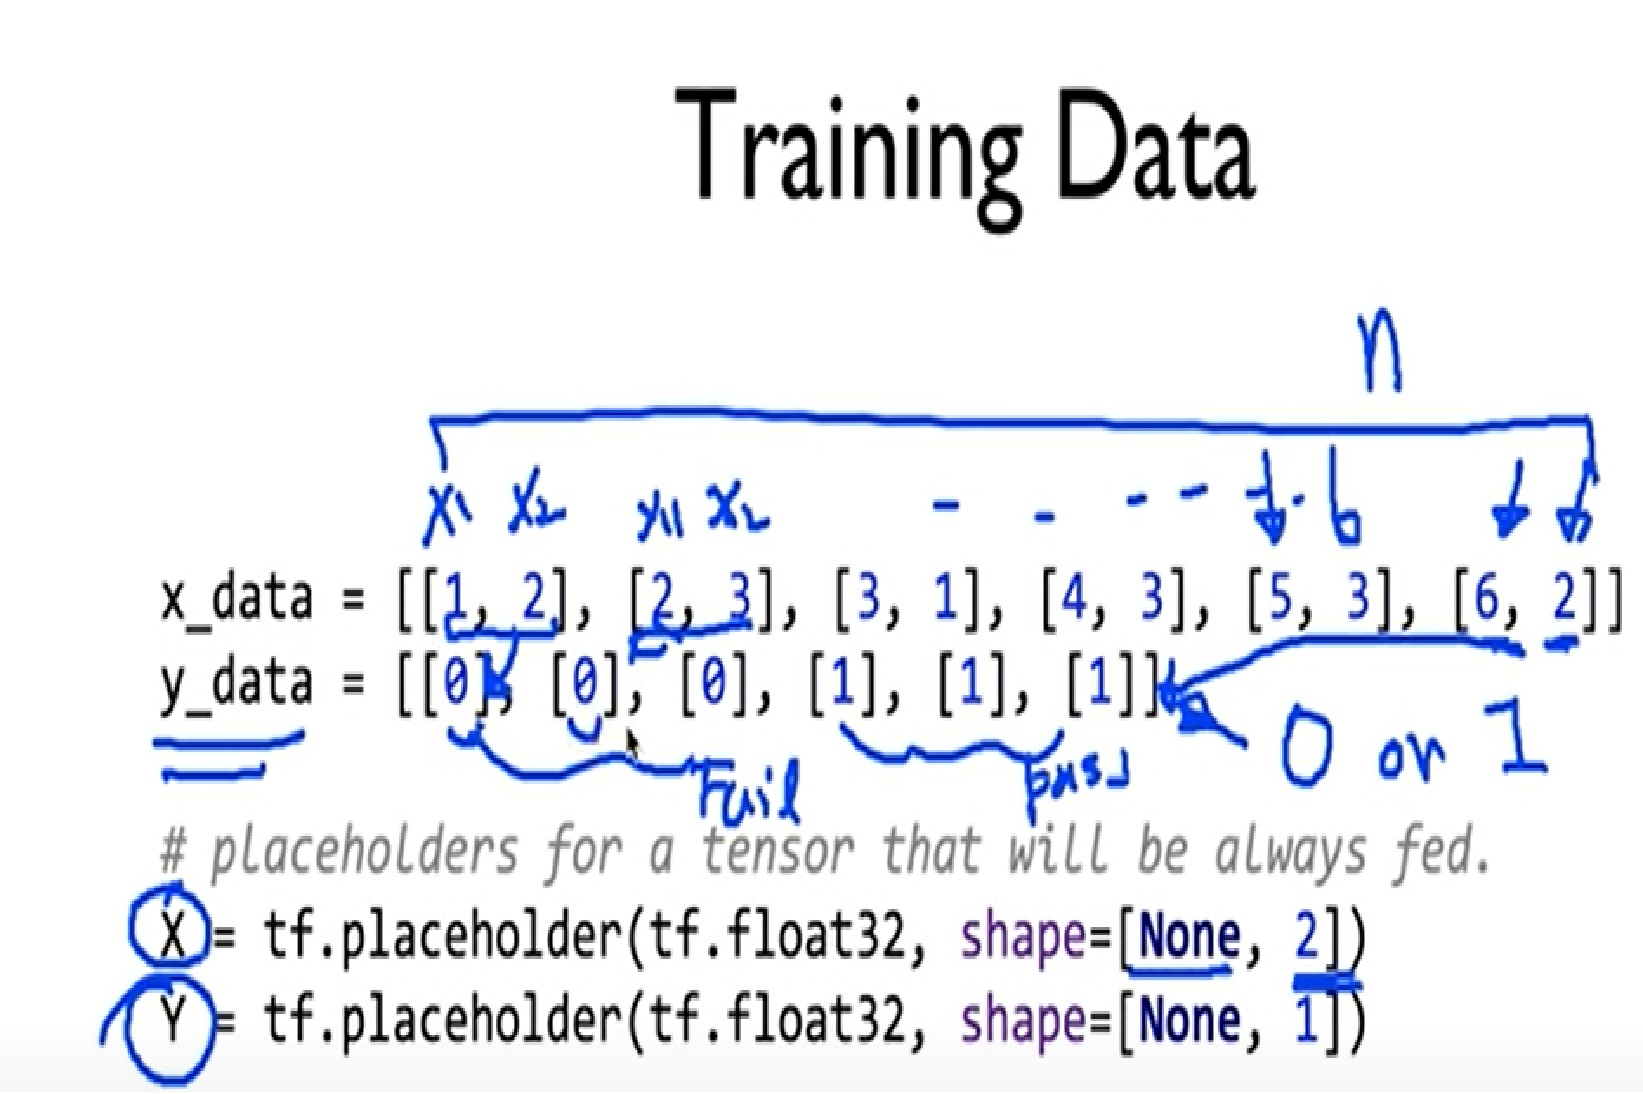

In [2]:
x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [3]:
X = tf.placeholder(tf.float32, shape = [None, 2])#위에 그림에서 보면, x값이 2개가 세트로 들어간다. 그리고, 세트들의 개수는 안정해져 있다
Y = tf.placeholder(tf.float32, shape = [None, 1])#위에 그림에서 보면, y값이 0아니면 1로 나오고, 결과의 개수는 정해지지 않았다
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')#이따 H(X) = Wx + b를 구해야 하는데, 
                                                         #지금 x가 (1,2)행렬이다. 그러므로 W는 (2,1)행렬이어야 값이 1개가 나온다!!
b = tf.Variable(tf.random_normal([1]), name = 'bias')

In [4]:
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

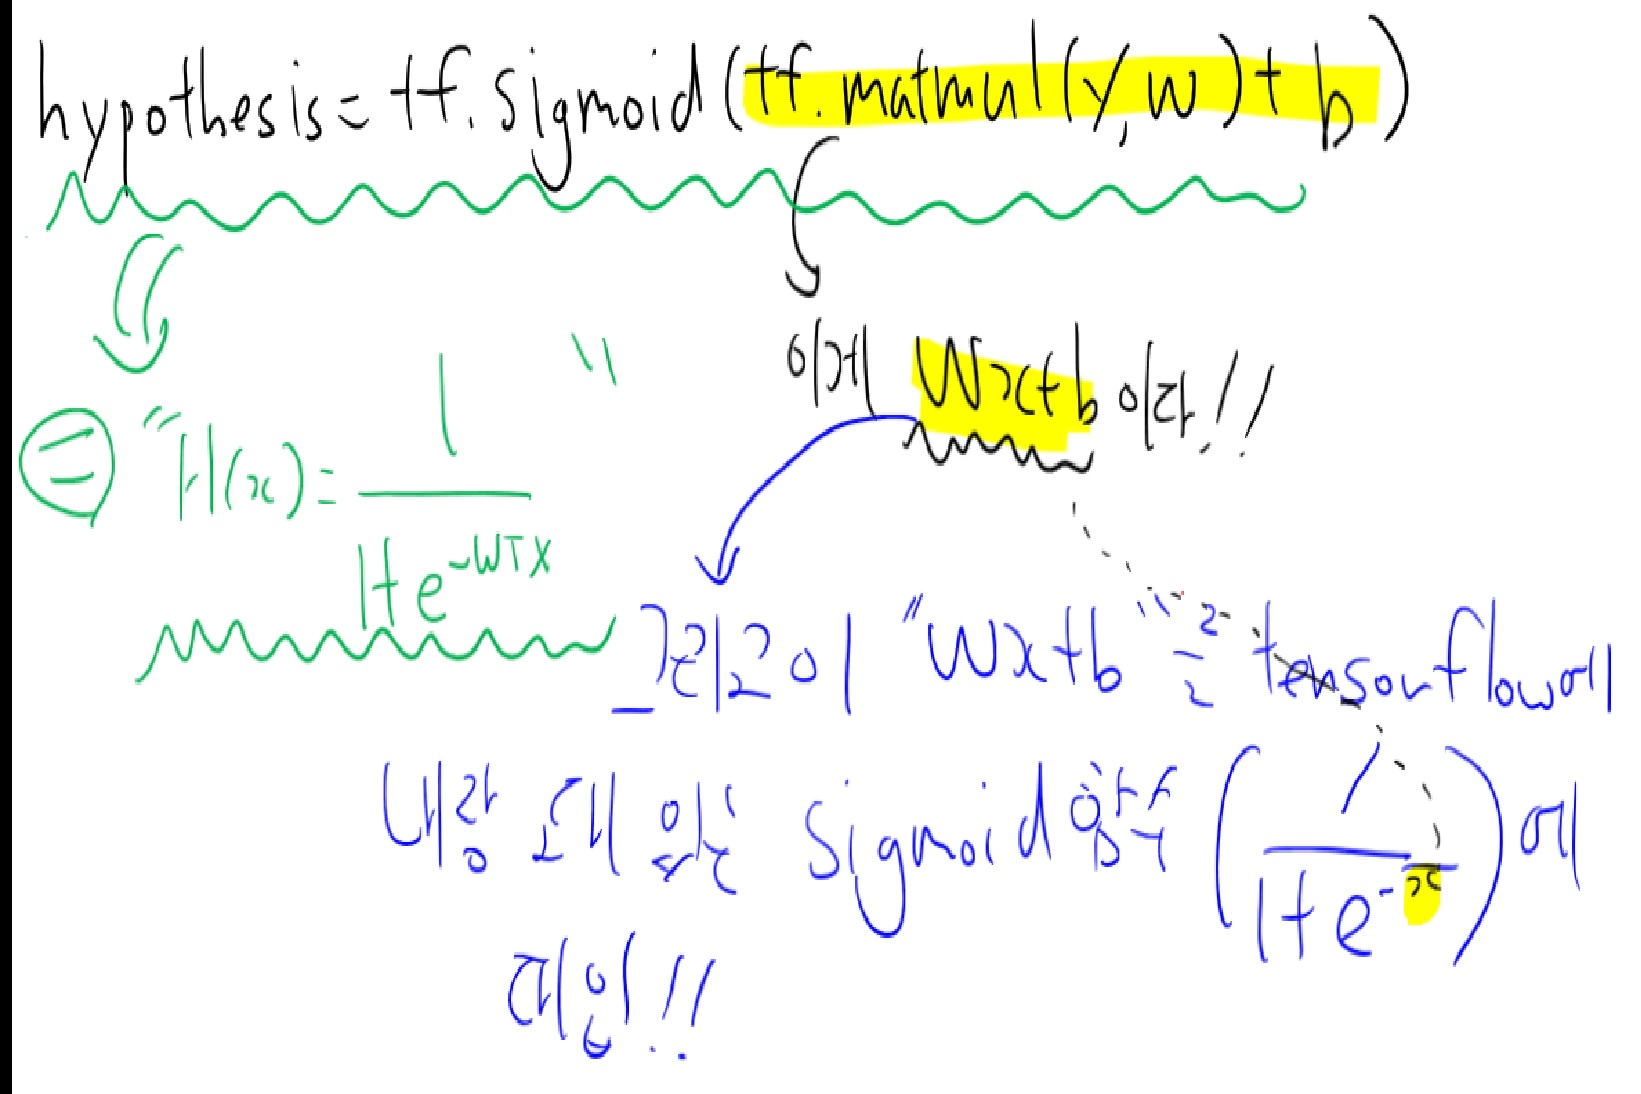

In [5]:
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

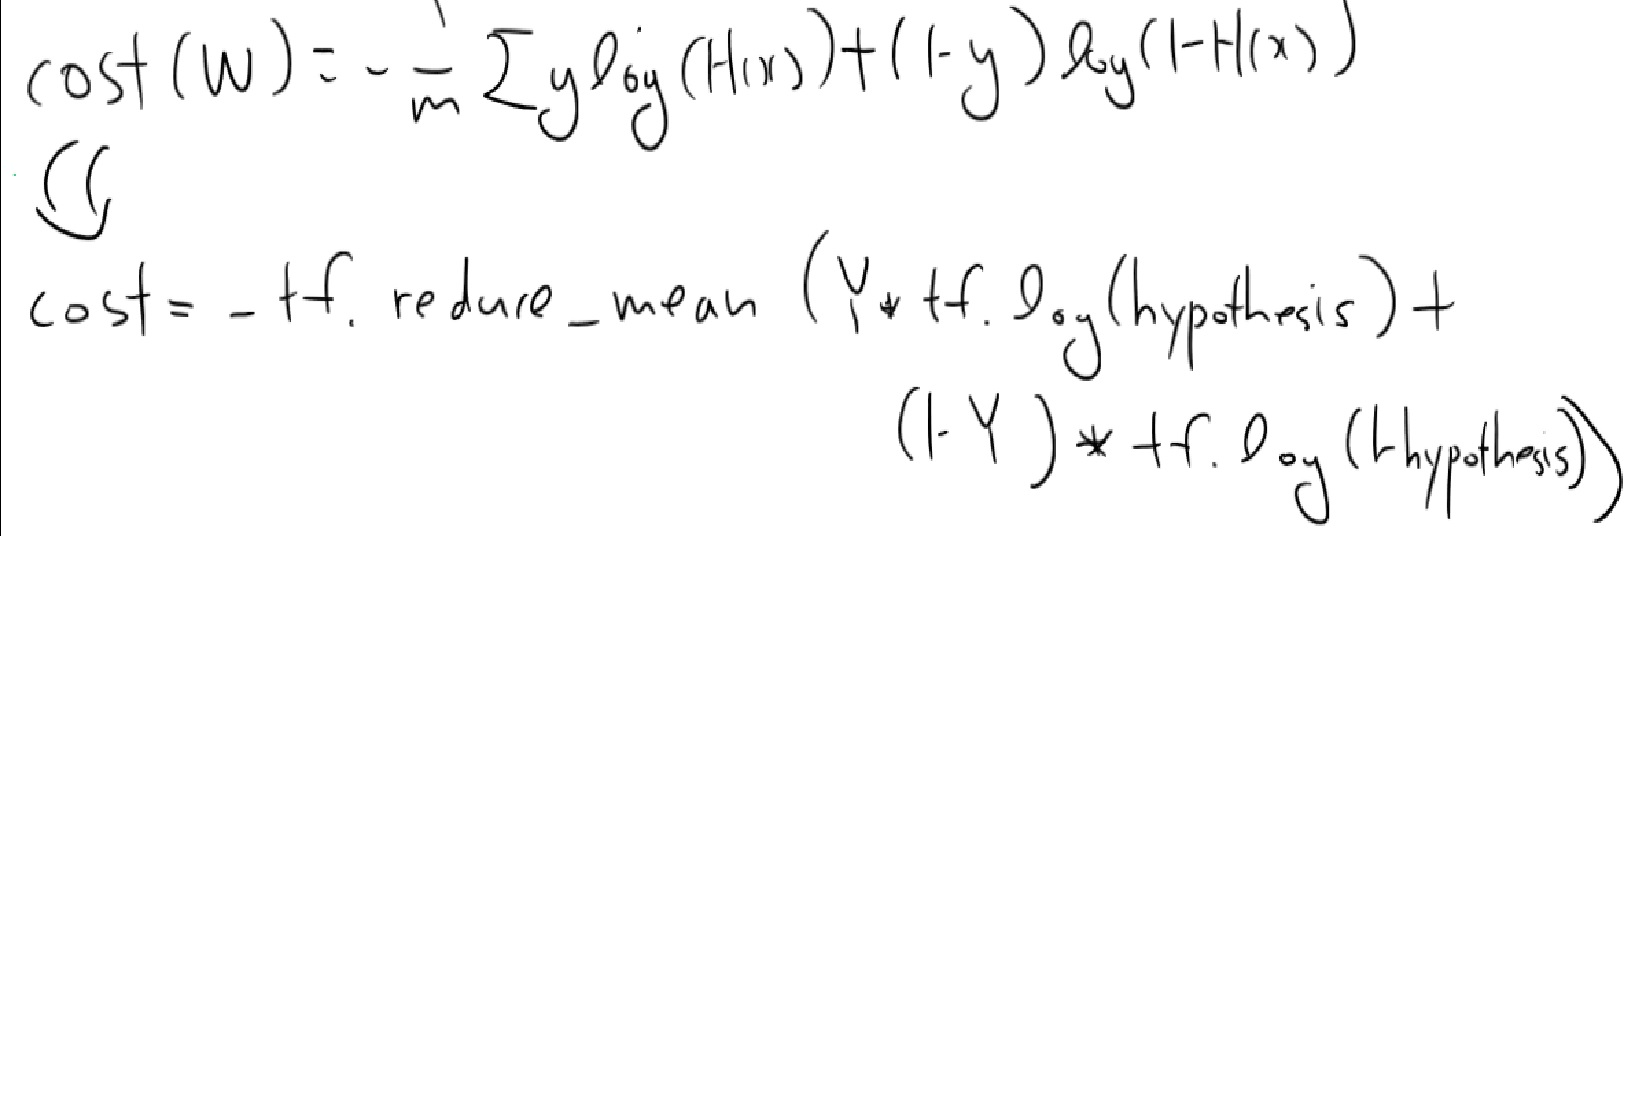

In [6]:
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

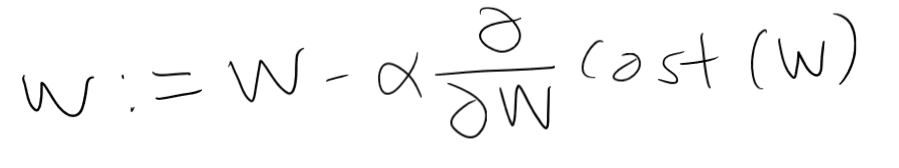

In [7]:
#Accuracy computation
#True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
#cast 함수가 뭐를 해주냐면, tf.cast(a,b)에서 a를 b type로 바꾸어준다. 여기서 hypothesis가 0.5이상이면 true인데, 이 true를 1.0로,
#0.5미만이면 false 인데, 이 false를 0.0으로
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
#여기서도 predicted랑 Y의 값이 일치하면 true,이걸 1.0으로 반환->이값들을 평균때림

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)
            
    #Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y:y_data})
    
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuract: ", a)

0 2.1956074
200 1.0146438
400 0.67818373
600 0.5403807
800 0.4796056
1000 0.4460409
1200 0.4233215
1400 0.4055976
1600 0.39051497
1800 0.37702647
2000 0.36462665
2200 0.35305297
2400 0.3421583
2600 0.33185336
2800 0.32207865
3000 0.3127906
3200 0.30395505
3400 0.2955424
3600 0.2875274
3800 0.27988645
4000 0.272598
4200 0.26564178
4400 0.25899893
4600 0.25265154
4800 0.2465831
5000 0.24077784
5200 0.23522103
5400 0.22989868
5600 0.22479802
5800 0.21990669
6000 0.2152132
6200 0.21070696
6400 0.206378
6600 0.20221668
6800 0.19821429
7000 0.1943624
7200 0.19065338
7400 0.18707974
7600 0.18363488
7800 0.18031211
8000 0.1771055
8200 0.17400937
8400 0.17101835
8600 0.16812737
8800 0.16533186
9000 0.1626272
9200 0.16000925
9400 0.15747407
9600 0.15501793
9800 0.15263723
10000 0.15032877

Hypothesis:  [[0.03109181]
 [0.15932143]
 [0.30654237]
 [0.78061765]
 [0.93909186]
 [0.9800067 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuract:  1.0
